# Import kaggle dependencies and auth

In [ ]:
! pip install -q kaggle

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!chmod 600  ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                               title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                             Spotify and Youtube                                 9MB  2023-03-20 15:43:25           8914        324  1.0              
ppb00x/country-gdp                                                Country_GDP                                         7KB  2023-04-07 06:47:36           1352         38  1.0              
erdemtaha/cancer-data                                             Cancer Data                                        49KB  2023-03-22 07:57:00           4095         96  1.0              
omartorres25/honda-data                                     

In [ ]:
!kaggle competitions download -c spaceship-titanic

  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 78.0MB/s]


In [ ]:
!unzip spaceship-titanic.zip

Archive:  spaceship-titanic.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# Explotary Data Analysis

**Description**

- 1. shape 8693, 14
- 2. There are some missing values
- 3. No correlations 

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [ ]:
df.shape

(8693, 14)

In [ ]:
df.corr()

<ipython-input-1110-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


In [ ]:
df.corr(method='kendall')

<ipython-input-1111-447f87d54f08>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='kendall')


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.093224,0.158939,0.077897,0.149026,0.137693,-0.058625
RoomService,0.093224,1.000000,0.150077,0.368303,0.202795,0.149201,-0.340207
FoodCourt,0.158939,0.150077,1.000000,0.153907,0.405693,0.428474,-0.170950
ShoppingMall,0.077897,0.368303,0.153907,1.000000,0.210980,0.159868,-0.209729
Spa,0.149026,0.202795,0.405693,0.210980,1.000000,0.372038,-0.339076
VRDeck,0.137693,0.149201,0.428474,0.159868,0.372038,1.000000,-0.322247
Transported,-0.058625,-0.340207,-0.170950,-0.209729,-0.339076,-0.322247,1.000000


In [ ]:
df.corr(method='pearson')

<ipython-input-1112-432dd9d4238b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


In [ ]:
df.corr(method='spearman')

<ipython-input-1113-657b2ea90450>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='spearman')


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.122796,0.207762,0.103350,0.196682,0.180948,-0.071029
RoomService,0.122796,1.000000,0.184662,0.443389,0.248940,0.182148,-0.371120
FoodCourt,0.207762,0.184662,1.000000,0.187404,0.486395,0.510977,-0.187148
ShoppingMall,0.103350,0.443389,0.187404,1.000000,0.257416,0.194061,-0.228556
Spa,0.196682,0.248940,0.486395,0.257416,1.000000,0.447894,-0.372582
VRDeck,0.180948,0.182148,0.510977,0.194061,0.447894,1.000000,-0.352305
Transported,-0.071029,-0.371120,-0.187148,-0.228556,-0.372582,-0.352305,1.000000


In [ ]:
df.info()
df['CryoSleep'] =df['CryoSleep'].astype('bool')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
corr=df['CryoSleep'].corr(df['Transported'])

In [ ]:
corr

0.45174373706870374

**Passenger ID**

- Categorical Variable
- 8693 Unique values (Same with shape) - No Missing values
- 201 missing values

In [ ]:
df.PassengerId

0       0001_01
1       0002_01
2       0003_01
3       0003_02
4       0004_01
         ...   
8688    9276_01
8689    9278_01
8690    9279_01
8691    9280_01
8692    9280_02
Name: PassengerId, Length: 8693, dtype: object

In [ ]:
len(df['PassengerId'].unique())

8693

**HomePlanet Variable**

- Categorical variable
- ['Europa', 'Earth', 'Mars', nan]

In [ ]:
df['HomePlanet'].head()

0    Europa
1     Earth
2    Europa
3    Europa
4     Earth
Name: HomePlanet, dtype: object

In [ ]:
df['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [ ]:
df['HomePlanet'].isnull().sum()

201

In [ ]:
(df['HomePlanet'].isnull().sum() / df.shape[0]) * 100

2.312205222592891

In [ ]:
df[df['HomePlanet'].isnull()].head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,False,0.0,0.0,NaN,0.0,0.0,Colatz Keen,True
113,0119_01,NaN,False,A/0/P,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,False
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,False,0.0,0.0,NaN,0.0,0.0,Arraid Inicont,True
225,0242_01,NaN,False,F/46/S,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,0.0,Almone Sté,False
234,0251_01,NaN,True,C/11/S,55 Cancri e,54.0,False,0.0,0.0,0.0,0.0,0.0,Diphah Amsive,True


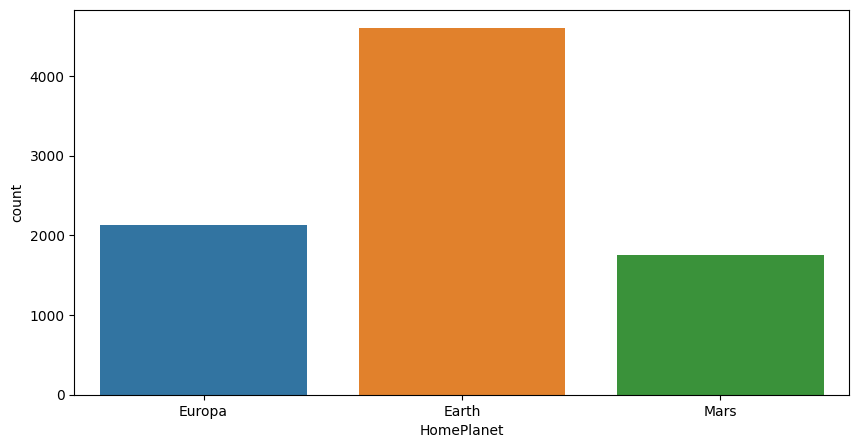

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['HomePlanet'], data=df)
plt.show()

In [ ]:
unique_planets = df['HomePlanet'].unique()

for planet in unique_planets:
  print(planet, "Count ---")
  print(len(df[ df['HomePlanet'] == planet ]))
  

Europa Count ---
2131
Earth Count ---
4602
Mars Count ---
1759
nan Count ---
0


In [ ]:
df.shape

(8693, 14)

**CryoSleep Variable**

- Categorical Variable
- False & True
- 217 Missing values

In [ ]:
df['CryoSleep']

0       False
1       False
2       False
3       False
4       False
        ...  
8688    False
8689     True
8690    False
8691    False
8692    False
Name: CryoSleep, Length: 8693, dtype: bool

In [ ]:
df['CryoSleep'].unique()

array([False,  True])

In [ ]:
df['CryoSleep'].isnull().sum() 

0

In [ ]:
(df['CryoSleep'].isnull().sum()  / df.shape[0]) * 100

0.0

<Axes: xlabel='CryoSleep', ylabel='count'>

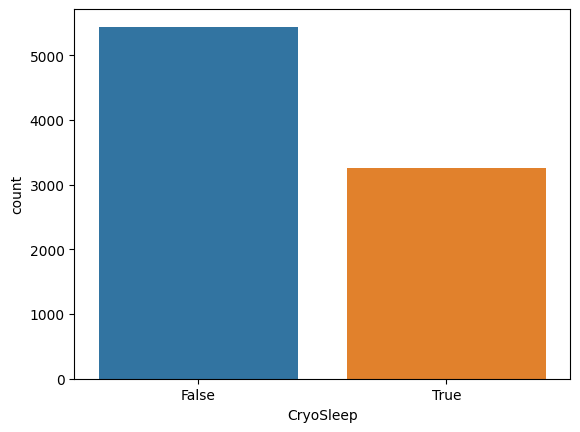

In [ ]:
sns.countplot(x='CryoSleep', data=df)

**Cabin Variable**

- Categorical data
- 6561 Unique Values
- 199 Missing values

In [ ]:
df['Cabin'].head()

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
Name: Cabin, dtype: object

In [ ]:
len(df['Cabin'].unique())

6561

In [ ]:
df['Cabin'].isnull().sum()

199

In [ ]:
(df['Cabin'].isnull().sum() / df.shape[0]) * 100

2.289198205452663

**Destination varibale**

- Categorical Variable
-'TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'
- 182 Missing Values

In [ ]:
df['Destination'].sample(5)

704     TRAPPIST-1e
7929    TRAPPIST-1e
5535    TRAPPIST-1e
3394    TRAPPIST-1e
8427    55 Cancri e
Name: Destination, dtype: object

In [ ]:
df['Destination'].unique() , len(df['Destination'].unique())

(array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object), 4)

In [ ]:
df['Destination'].isnull().sum()

182

In [ ]:
( df['Destination'].isnull().sum() / df.shape[0] ) * 100

2.093638559760727

<Axes: xlabel='Destination', ylabel='count'>

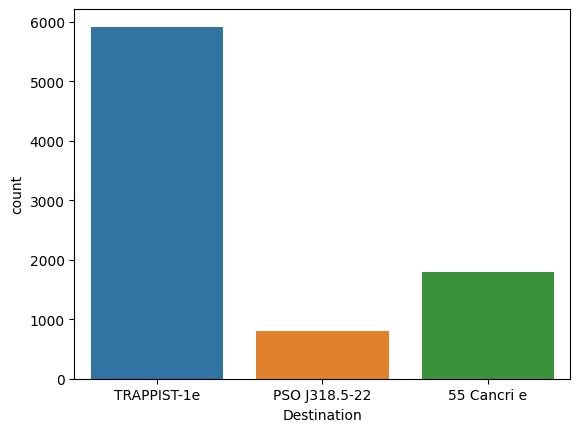

In [ ]:
sns.countplot(x=df['Destination'], data=df)

**Age Variable**

- Continuous Variable (float64)
- 179 missing values
- 81 Ages

In [ ]:
df['Age'].head()

0    39.0
1    24.0
2    58.0
3    33.0
4    16.0
Name: Age, dtype: float64

In [ ]:
df['Age'].isnull().sum()

179

In [ ]:
(df['Age'].isnull().sum() / df.shape[0]) * 100

2.0591280340503855

In [ ]:
len(df['Age'].unique())

81

In [ ]:
df['Age'].describe().T

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

In [ ]:
df['Age'].median()

27.0

<Axes: xlabel='Age', ylabel='Count'>

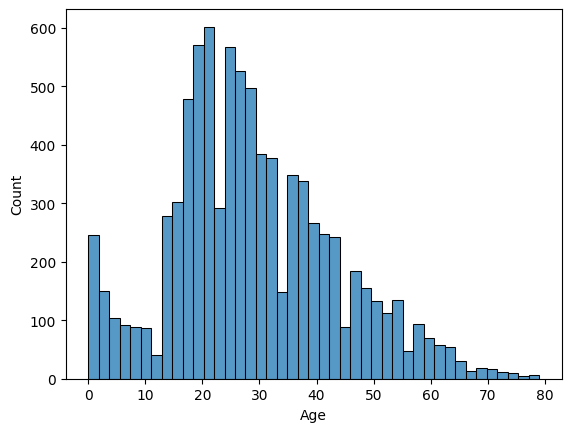

In [ ]:
sns.histplot(x=df['Age'], data=df)

**VIP Variable**

- Categorical Data
- 203 missing values
- Need to convert Binary - 1 /0
- Only 199 VIP availables

In [ ]:
df['VIP'].head()

0    False
1    False
2     True
3    False
4    False
Name: VIP, dtype: object

In [ ]:
df['VIP'].unique()

array([False, True, nan], dtype=object)

In [ ]:
df['VIP'].isnull().sum()

203

<Axes: xlabel='VIP', ylabel='count'>

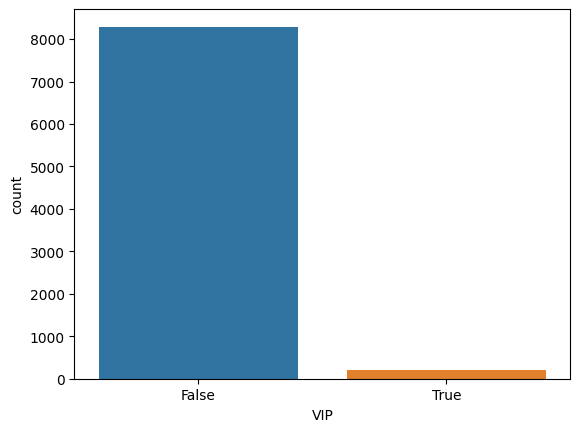

In [ ]:
sns.countplot(x=df['VIP'], data=df)

In [ ]:
len(df[df['VIP'] == True]) , len(df[df['VIP'] == False])

(199, 8291)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(2), float64(6), object(6)
memory usage: 832.1+ KB


**Room Service Variable**

- Continous Varibale - float
- Mean 8512
- Meadian 0
- 181 missing values can fill with median because about 50% data is 0
- 1274 Unique values

In [ ]:
df['RoomService']

0         0.0
1       109.0
2        43.0
3         0.0
4       303.0
        ...  
8688      0.0
8689      0.0
8690      0.0
8691      0.0
8692    126.0
Name: RoomService, Length: 8693, dtype: float64

In [ ]:
df['RoomService'].describe().T

count     8512.000000
mean       224.687617
std        666.717663
min          0.000000
25%          0.000000
50%          0.000000
75%         47.000000
max      14327.000000
Name: RoomService, dtype: float64

In [ ]:
df [df['RoomService'] == 14327.00]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
4416,4690_02,Europa,False,NaN,TRAPPIST-1e,27.0,False,14327.0,1487.0,0.0,1.0,0.0,Tope Dishocatal,False


In [ ]:
df['RoomService'].median()

0.0

In [ ]:
df['RoomService'].isnull().sum()

181

In [ ]:
len(df['RoomService'].unique())

1274

<Axes: xlabel='RoomService', ylabel='Count'>

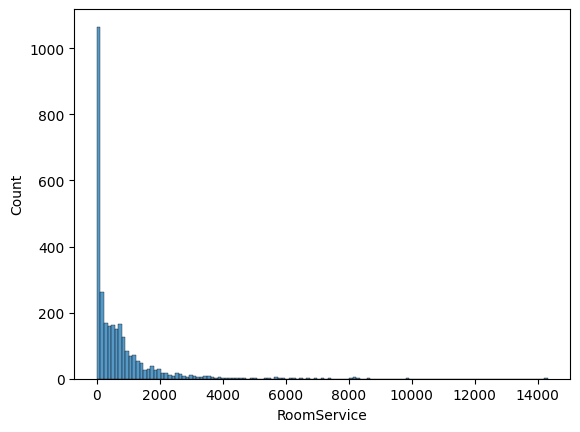

In [ ]:
sns.histplot(x = 'RoomService', data=df[df['RoomService'] != 0.00])

**Food Court Variable**

- Continuos Varibale
- Mean 458
- Median 0
- 183 Missing values
-1508 Unique values

In [ ]:
df['FoodCourt']

0          0.0
1          9.0
2       3576.0
3       1283.0
4         70.0
         ...  
8688    6819.0
8689       0.0
8690       0.0
8691    1049.0
8692    4688.0
Name: FoodCourt, Length: 8693, dtype: float64

In [ ]:
df['FoodCourt'].describe().T

count     8510.000000
mean       458.077203
std       1611.489240
min          0.000000
25%          0.000000
50%          0.000000
75%         76.000000
max      29813.000000
Name: FoodCourt, dtype: float64

In [ ]:
df['FoodCourt'].median()

0.0

In [ ]:
df['FoodCourt'].isnull().sum()

183

In [ ]:
len(df['FoodCourt'].unique())

1508

In [ ]:
len(df[df['FoodCourt'] != 0.00])

3237

<Axes: xlabel='FoodCourt', ylabel='Count'>

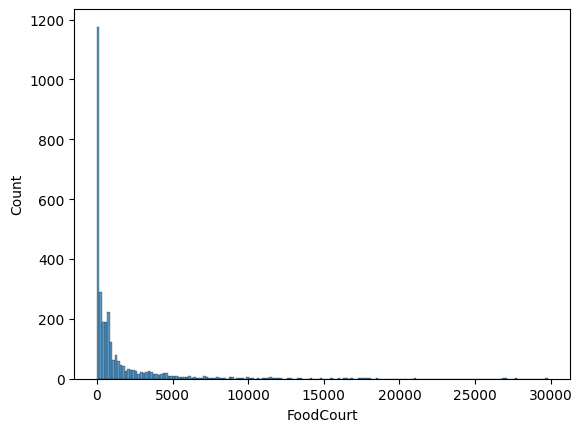

In [ ]:
sns.histplot(x = 'FoodCourt',  data=df[df['FoodCourt'] != 0])

<Axes: xlabel='FoodCourt'>

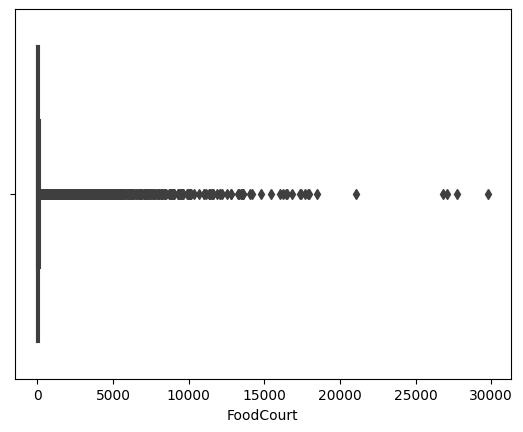

In [ ]:
sns.boxplot(x='FoodCourt', data= df)

**ShoppingMall Varibale**

- Categorical Varibale
- Mean 173
- Median 0
- 208 Missing values
- 1116 unique values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(2), float64(6), object(6)
memory usage: 832.1+ KB


In [ ]:
df['ShoppingMall']

0          0.0
1         25.0
2          0.0
3        371.0
4        151.0
         ...  
8688       0.0
8689       0.0
8690    1872.0
8691       0.0
8692       0.0
Name: ShoppingMall, Length: 8693, dtype: float64

In [ ]:
df['ShoppingMall'].describe().T

count     8485.000000
mean       173.729169
std        604.696458
min          0.000000
25%          0.000000
50%          0.000000
75%         27.000000
max      23492.000000
Name: ShoppingMall, dtype: float64

In [ ]:
df['ShoppingMall'].median()

0.0

In [ ]:
df['ShoppingMall'].isnull().sum()

208

In [ ]:
len(df['ShoppingMall'].unique())

1116

<Axes: xlabel='ShoppingMall', ylabel='Count'>

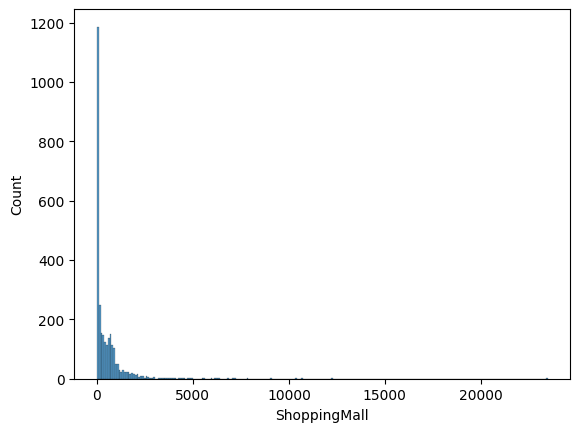

In [ ]:
sns.histplot(x = 'ShoppingMall',  data=df[df['ShoppingMall'] != 0.00])

<Axes: xlabel='ShoppingMall'>

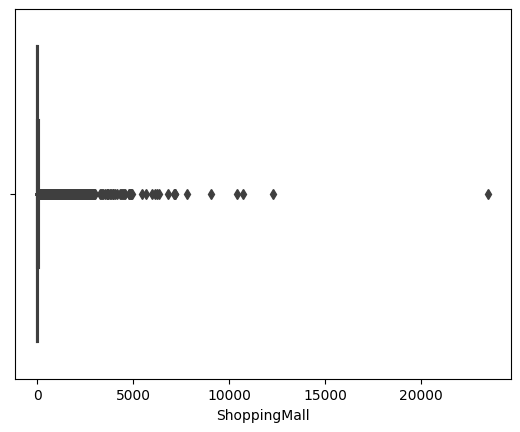

In [ ]:
sns.boxplot(x='ShoppingMall', data= df)

**Spa Varibale**

- Continous variable
- mean 311
- 183 Null Values
- Median 0

In [ ]:
df['Spa']

0          0.0
1        549.0
2       6715.0
3       3329.0
4        565.0
         ...  
8688    1643.0
8689       0.0
8690       1.0
8691     353.0
8692       0.0
Name: Spa, Length: 8693, dtype: float64

In [ ]:
df['Spa'].describe().T

count     8510.000000
mean       311.138778
std       1136.705535
min          0.000000
25%          0.000000
50%          0.000000
75%         59.000000
max      22408.000000
Name: Spa, dtype: float64

In [ ]:
df['Spa'].median()

0.0

In [ ]:
df['Spa'].isnull().sum()

183

<Axes: xlabel='Spa', ylabel='Count'>

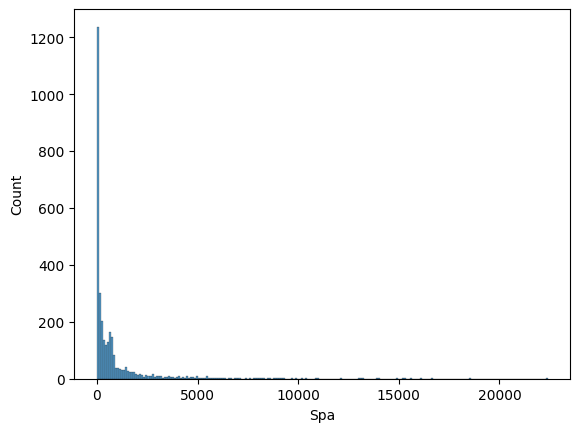

In [ ]:
sns.histplot(x='Spa', data= df[ df['Spa'] != 0])

<Axes: xlabel='Spa'>

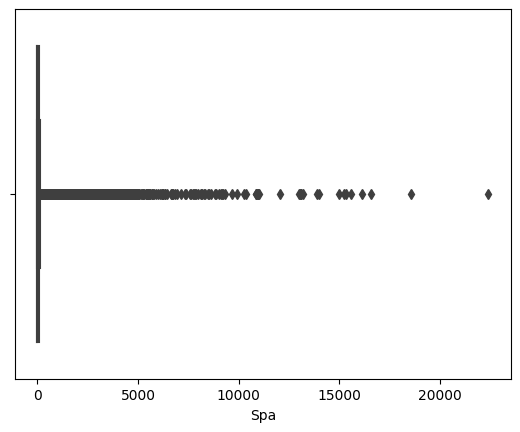

In [ ]:
sns.boxplot(x='Spa', data= df)

**VRDeck Variable**

- Continuos
- mean 304
- median 0
- 188 Null Values

In [ ]:
df['VRDeck']

0          0.0
1         44.0
2         49.0
3        193.0
4          2.0
         ...  
8688      74.0
8689       0.0
8690       0.0
8691    3235.0
8692      12.0
Name: VRDeck, Length: 8693, dtype: float64

In [ ]:
df['VRDeck'].describe().T

count     8505.000000
mean       304.854791
std       1145.717189
min          0.000000
25%          0.000000
50%          0.000000
75%         46.000000
max      24133.000000
Name: VRDeck, dtype: float64

In [ ]:
df['VRDeck'].median()

0.0

In [ ]:
df['VRDeck'].isnull().sum()

188

<Axes: xlabel='VRDeck', ylabel='Count'>

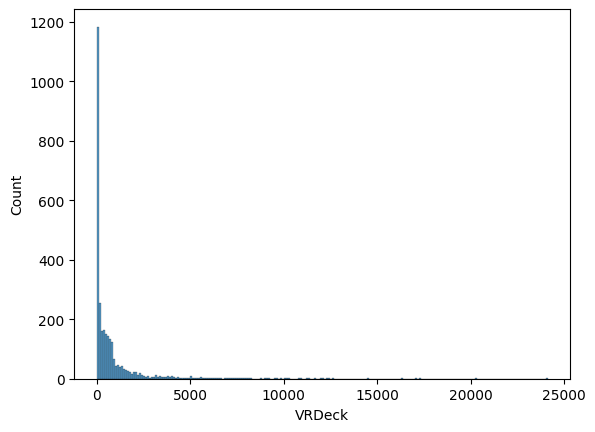

In [ ]:
sns.histplot(x='VRDeck', data= df [df['VRDeck'] != 0] )

<Axes: xlabel='VRDeck'>

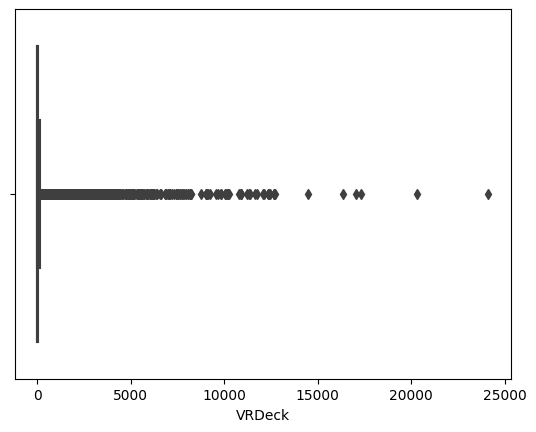

In [ ]:
sns.boxplot(x='VRDeck', data =df)

**Name Varibale**

- Categorical 
- 8474 Unique values
- 200 Null values
- 219 Duplicated names

In [ ]:
df['Name']

0         Maham Ofracculy
1            Juanna Vines
2           Altark Susent
3            Solam Susent
4       Willy Santantines
              ...        
8688    Gravior Noxnuther
8689      Kurta Mondalley
8690         Fayey Connon
8691     Celeon Hontichre
8692     Propsh Hontichre
Name: Name, Length: 8693, dtype: object

In [ ]:
len(df['Name'].unique())

8474

In [ ]:
df.shape

(8693, 14)

In [ ]:
df['Name'].isnull().sum()

200

In [ ]:
sum(df['Name'].duplicated())

219

In [ ]:
duplicated_indexs = df['Name'].duplicated()

In [ ]:
duplicated_indexs.info()

<class 'pandas.core.series.Series'>
RangeIndex: 8693 entries, 0 to 8692
Series name: Name
Non-Null Count  Dtype
--------------  -----
8693 non-null   bool 
dtypes: bool(1)
memory usage: 8.6 KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(2), float64(6), object(6)
memory usage: 832.1+ KB


**Transported**

- Categorical Boolean
- No missing values
- Y variable
- Only True and False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(2), float64(6), object(6)
memory usage: 832.1+ KB


In [ ]:
df['Transported']

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [ ]:
df['Transported'].describe().T

count     8693
unique       2
top       True
freq      4378
Name: Transported, dtype: object

In [ ]:
df['Transported'].mode()

0    True
Name: Transported, dtype: bool

In [ ]:
df['Transported'].unique()

array([False,  True])

In [ ]:
df['Transported'].isnull().sum()

0

<Axes: xlabel='Transported', ylabel='count'>

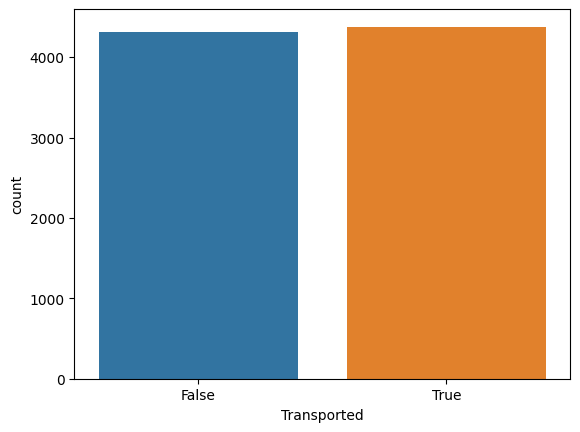

In [ ]:
sns.countplot(x='Transported', data=df)

In [ ]:
len (df [df['Transported'] == True]) , len (df [df['Transported'] == False])

(4378, 4315)

**Overall**

In [ ]:
missing_props = df.isna().mean(axis=0)

In [ ]:
missing_props

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.000000
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64

**Fill Missing values**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(2), float64(6), object(6)
memory usage: 832.1+ KB


In [ ]:
df.Age.mean()

28.82793046746535

In [ ]:
df.RoomService.median()

0.0

In [ ]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
len(df.ShoppingMall.isnull())

8693

# Data Understanding with mutiple varibales

**Categorical vs Numeric**

- VS Age

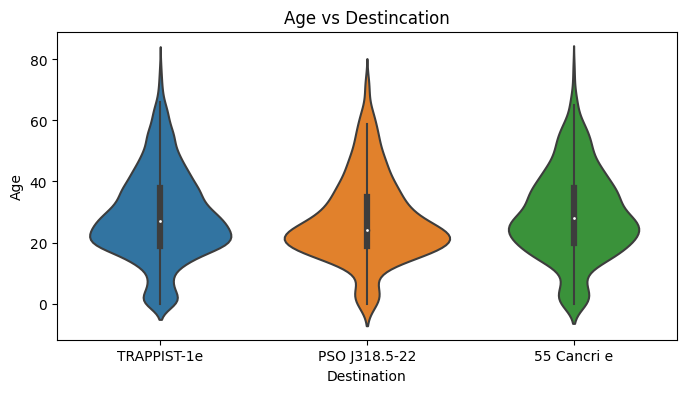

In [ ]:
plt.figure(figsize=(8,4))
sns.violinplot(y='Age', x= 'Destination', data=df ).set_title('Age vs Destincation')
plt.show()

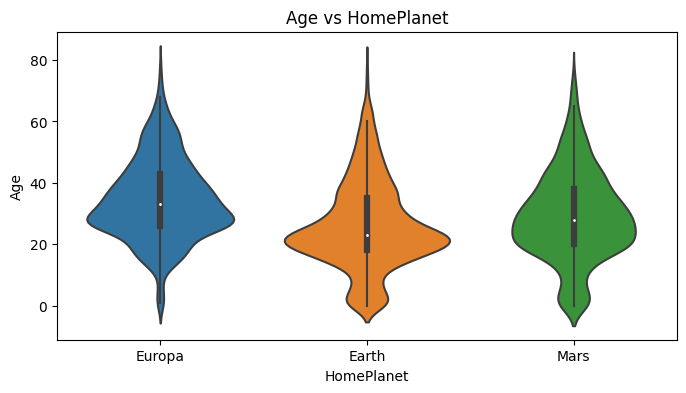

In [ ]:
plt.figure(figsize=(8,4))
sns.violinplot(y='Age', x= 'HomePlanet', data=df ).set_title('Age vs HomePlanet')
plt.show()

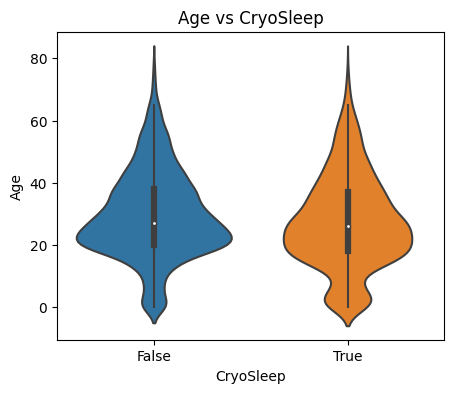

In [ ]:
plt.figure(figsize=(5,4))
sns.violinplot(y='Age', x= 'CryoSleep', data=df ).set_title('Age vs CryoSleep')
plt.show()

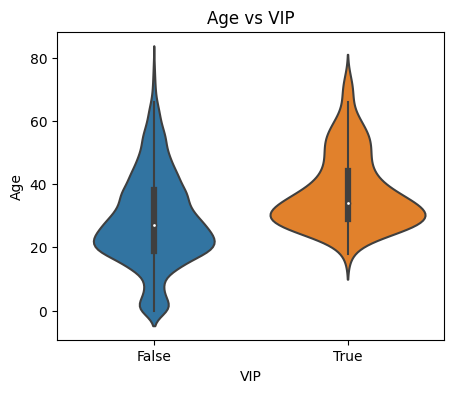

In [ ]:
plt.figure(figsize=(5,4))
sns.violinplot(y='Age', x= 'VIP', data=df ).set_title('Age vs VIP')
plt.show()

In [ ]:
df['Age'].describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

In [ ]:
df [df['Age'] == 0 ]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
19,0017_01,Earth,False,G/0/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Lyde Brighttt,True
61,0067_01,Earth,True,G/10/S,PSO J318.5-22,0.0,False,0.0,0.0,0.0,0.0,0.0,Ninaha Leeves,True
86,0092_02,Earth,True,G/9/P,TRAPPIST-1e,0.0,False,0.0,0.0,NaN,0.0,0.0,Stald Hewson,True
102,0108_03,Earth,False,G/19/S,TRAPPIST-1e,0.0,NaN,0.0,0.0,0.0,0.0,0.0,Oline Handertiz,True
157,0179_02,Earth,False,G/26/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Raque Webstephrey,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8494,9074_01,Earth,True,G/1460/S,TRAPPIST-1e,0.0,NaN,0.0,0.0,NaN,0.0,0.0,Adamie Trerady,True
8584,9163_01,Earth,True,G/1477/S,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Idace Edwartizman,True
8650,9227_04,Earth,True,G/1498/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Robyny Hinglendez,True
8654,9231_02,Mars,False,F/1888/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Walls Paie,True


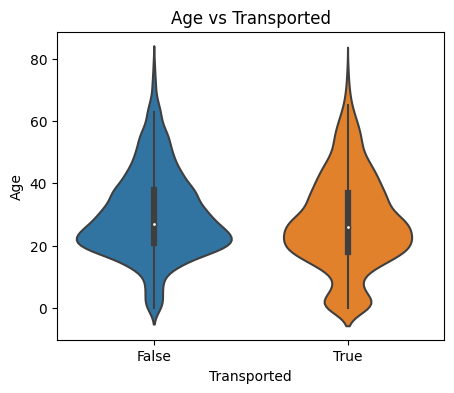

In [ ]:
plt.figure(figsize=(5,4))
sns.violinplot(y='Age', x= 'Transported', data=df ).set_title('Age vs Transported')
plt.show()

**Numerical vs Numerical**

-  Vs RoomService, FoodCourt, ShoppingMall, Spa, VRDeck

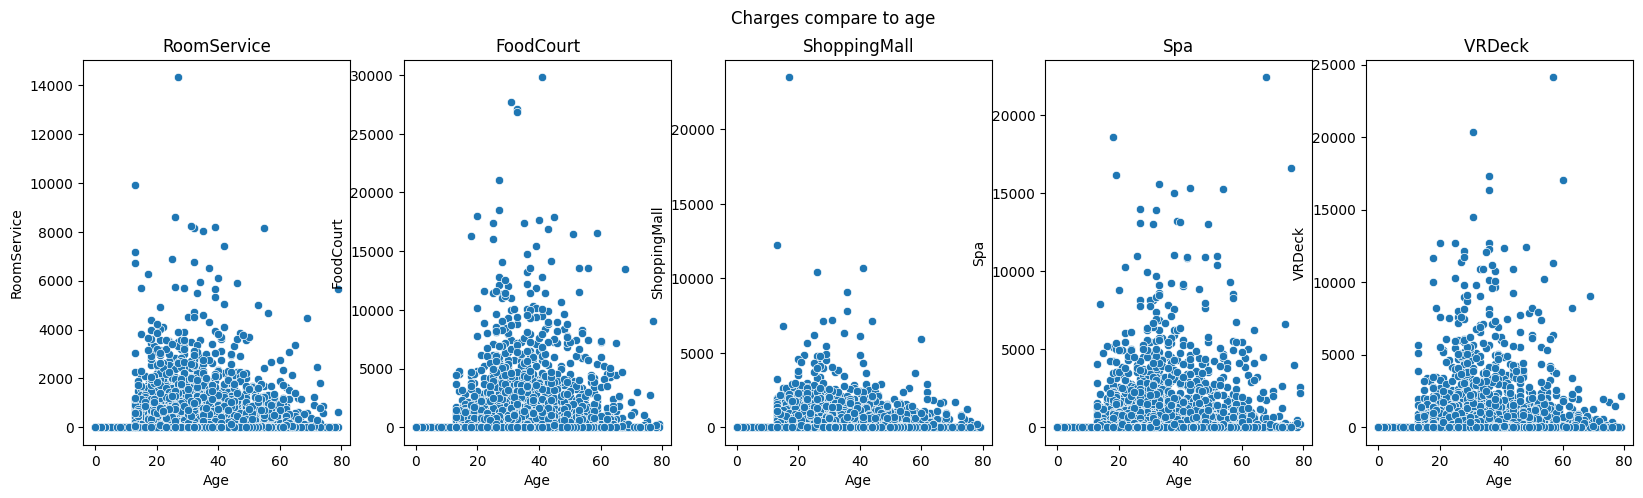

<Figure size 2000x1000 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(1,5, figsize=(20,5))
fig.suptitle('Charges compare to age')
plt.figure(figsize=(20,10))
sns.scatterplot(ax =ax[0], x='Age', y= 'RoomService', data=df ).set_title('RoomService')
sns.scatterplot(ax =ax[1], x='Age', y= 'FoodCourt', data=df ).set_title('FoodCourt')
sns.scatterplot(ax =ax[2], x='Age', y= 'ShoppingMall', data=df ).set_title('ShoppingMall')
sns.scatterplot(ax =ax[3], x='Age', y= 'Spa', data=df ).set_title('Spa')
sns.scatterplot(ax =ax[4], x='Age', y= 'VRDeck', data=df ).set_title('VRDeck ')
plt.show()

**Categorical vs Categorical**

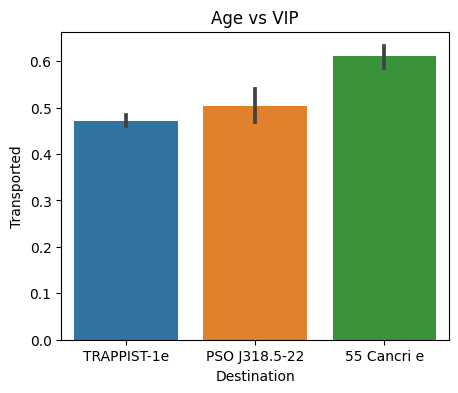

In [ ]:
plt.figure(figsize=(5,4))
sns.barplot(x='Destination', y= 'Transported', data=df ).set_title('Age vs VIP')
plt.show()

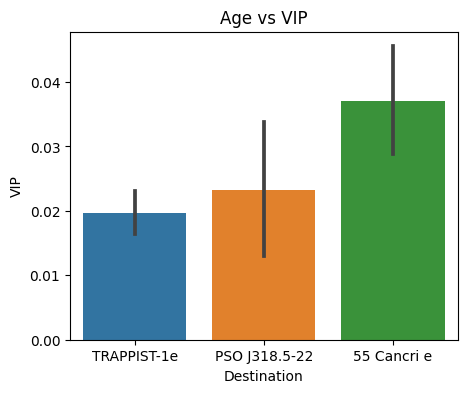

In [ ]:
plt.figure(figsize=(5,4))
sns.barplot(x='Destination', y= 'VIP', data=df ).set_title('Age vs VIP')
plt.show()

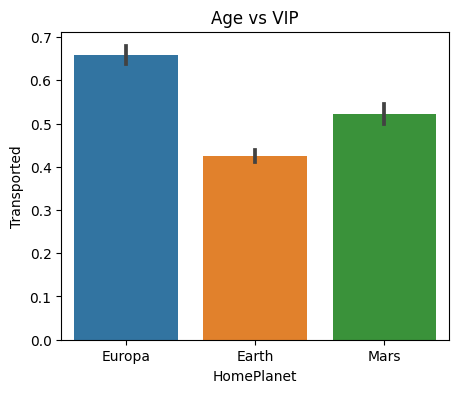

In [ ]:
plt.figure(figsize=(5,4))
sns.barplot(x='HomePlanet', y= 'Transported', data=df ).set_title('Age vs VIP')
plt.show()

# Pre Processing

In [ ]:
df.VIP

0       False
1       False
2        True
3       False
4       False
        ...  
8688     True
8689    False
8690    False
8691    False
8692    False
Name: VIP, Length: 8693, dtype: object

**Functions**

In [ ]:
age_dic = {
    'infrant' : 2,
    'Toddler' : 5,
    'Child': 12,
    'Teen':19,
    'Adult':39,
    'Middle':59,
    'Senior':100
}

def age_group(age):

  if age <=2:
    return 'Infrant'
  elif age <= 5:
    return 'Toddler'
  elif age <= 12:
    return 'Child'
  elif age <= 19:
    return 'Teen'
  elif age <= 39:
    return 'Adult'
  elif age <= 59:
    return 'Middle'
  else :
    return 'Senior'

def splitCabin(cabin, Index):
  cabin=str(cabin)
  cabin = cabin.strip()
  cabin_sp = cabin.split('/')

  return cabin_sp[Index]


def splitPassengerId(passengerid, Index):
  pid = str(passengerid)
  pid = pid.strip()
  pid_sp = pid.split('_')

  return pid_sp[Index]

Remove Unnessary data for modeling

In [ ]:
def Preprocessing(df):

  # Fill Home Planet
  df.HomePlanet.fillna('Missing',  inplace=True)

  # Fill CryoSleep 
  df.CryoSleep.fillna('Missing',  inplace=True)

  # Fill Cabin 
  df.Cabin.fillna('F/82/S', inplace=True)

   # Fill Destination 
  df.Destination.fillna('Missing', inplace=True)

   # Fill Age with mean 
  df.Age.fillna(df.Age.mean(),  inplace=True)
  #Fill Age 0 with 1
  df.Age.replace(to_replace = 0, value = 1, inplace=True )
 

  # Drop VIP null
  # df.VIP.fillna(False, inplace=True)

  # # Fill VIP with median 
  # df.VIP.fillna(False, inplace=True)

  # Fill RoomServices with median 
  df.RoomService.fillna(df.RoomService.median(), inplace=True)

  # Fill FoodCourt with median 
  df.FoodCourt.fillna(df.FoodCourt.median(), inplace=True)

  # Fill ShoppingMall with median 
  df.ShoppingMall.fillna(df.ShoppingMall.median(),  inplace=True)

  # Fill Spa with median 
  df.Spa.fillna(df.Spa.median(), inplace=True)

  # Fill VRDeck  with median 
  df.VRDeck.fillna(df.VRDeck.median(), inplace=True)

  # Fill Missing Name  
  df.Name.fillna('Missing', inplace=True)

 




In [ ]:
def feature_enginnering(df):

  import numpy as np
   #Change Ages
  #Infant = 0-1 year. Toddler = 2-4 yrs. Child = 5-12 yrs. Teen = 13-19 yrs. Adult = 20-39 yrs. Middle Age Adult = 40-59 yrs. Senior Adult = 60 
  df['Age_Group'] = df['Age'].apply(lambda x: age_group(x))


  #**Get value/ mean from each Expendure**

  #apply scaling reduced accuracy
  # scaler = MinMaxScaler()

  mean_RoomService = df['RoomService'].mean()
  df['RoomService_m'] = df['RoomService'].apply(lambda x: (x/mean_RoomService))

  #apply scaling reduced accuracy
    # RoomService_m = [ex for ex in df['RoomService_m']]
    # RoomService_m = scaler.fit_transform([RoomService_m])
    # RoomService_m = np.array(RoomService_m)
    # df['RoomService_m'] = [d for d in RoomService_m[0]]

  mean_FoodCourt = df['FoodCourt'].mean()
  df['FoodCourt_m'] = df['FoodCourt'].apply(lambda x: (x/mean_FoodCourt))
  #apply scaling reduced accuracy
    # FoodCourt_m = [ex for ex in df['FoodCourt_m']]
    # FoodCourt_m = scaler.fit_transform([FoodCourt_m])
    # FoodCourt_m = np.array(FoodCourt_m)
    # df['FoodCourt_m'] = [d for d in FoodCourt_m[0]]

  mean_ShoppingMall = df['ShoppingMall'].mean()
  df['ShoppingMall_m'] = df['ShoppingMall'].apply(lambda x: (x/mean_ShoppingMall))
  #apply scaling reduced accuracy
    # ShoppingMall_m = [ex for ex in df['ShoppingMall_m']]
    # ShoppingMall_m = scaler.fit_transform([ShoppingMall_m])
    # ShoppingMall_m = np.array(ShoppingMall_m)
    # df['ShoppingMall_m'] = [d for d in ShoppingMall_m[0]]

  mean_Spa = df['Spa'].mean()
  df['Spa_m'] = df['Spa'].apply(lambda x: (x/mean_Spa))
  #apply scaling reduced accuracy
    # Spa_m = [ex for ex in df['Spa_m']]
    # Spa_m = scaler.fit_transform([Spa_m])
    # Spa_m = np.array(Spa_m)
    # df['Spa_m'] = [d for d in Spa_m[0]]

  mean_VRDeck = df['VRDeck'].mean()
  df['VRDeck_m'] = df['VRDeck'].apply(lambda x: (x/mean_VRDeck)) 
  #apply scaling reduced accuracy
    # VRDeck_m = [ex for ex in df['VRDeck_m']]
    # VRDeck_m = scaler.fit_transform([VRDeck_m])
    # VRDeck_m = np.array(VRDeck_m)
    # df['VRDeck_m'] = [d for d in VRDeck_m[0]]
  
 
  #**Cabin Feture Extraction**  - deck/num/side

  cabinNotnan = df [df ['Cabin'] !='nan']
  # cabinNotnan[cabinNotnan['Cabin'] == 'nan']

  cabinNotnanDeck = [splitCabin(x,0) for x in cabinNotnan['Cabin']]
  cabinNotnanNum = [splitCabin(x,1) for x in cabinNotnan['Cabin']]
  cabinNotnanSide = [splitCabin(x,2) for x in cabinNotnan['Cabin']]

  import numpy as np
  from scipy import stats as st

  cabinNotnanDeck = np.array(cabinNotnanDeck)
  len(np.unique(cabinNotnanDeck))
  ax = st.mode(cabinNotnanDeck)
  desk = ax.mode[0]

  cabinNotnanNum = np.array(cabinNotnanNum)
  len(np.unique(cabinNotnanNum))
  ax = st.mode(cabinNotnanNum)
  numd = ax.mode[0]

  cabinNotnanSide = np.array(cabinNotnanSide)
  len(np.unique(cabinNotnanSide))
  ax = st.mode(cabinNotnanSide)
  side = ax.mode[0]

  cabinMode = desk +'/'+ numd +'/'+side
  len(df [df['Cabin'] =='nan'])

  df['Cabin_Deck'] =df['Cabin'].apply(lambda cab :splitCabin(cab,0))
  df['Cabin_Num'] = df['Cabin'].apply(lambda a :splitCabin(a,1))
  df['Cabin_Side'] = df['Cabin'].apply(lambda b :splitCabin(b,2))

  #change deck number to int
  df['Cabin_Num'] = df['Cabin_Num'].astype(int)

  #**Chnage VIP and Transport Data to 1/0**

  from sklearn.preprocessing import LabelEncoder
  df['CryoSleep'] = df['CryoSleep'].astype('bool')

  le = LabelEncoder()
  df['VIP_ts'] = le.fit_transform(df['VIP'])
  df['Transported_ts'] =le.fit_transform(df['Transported'])
  df['CryoSleep_ts'] =le.fit_transform(df['CryoSleep'])


  #**Passenger Feture Extraction**  - group_id
  df['Group']=df['PassengerId'].apply(lambda pid :splitPassengerId(pid, 0) )
  df['ID']=df['PassengerId'].apply(lambda pid :splitPassengerId(pid, 1) )
  df['ID'] = df['ID'].astype('int')
  df['Group'] = df['Group'].astype('int')



In [ ]:
def column_drops(df):
  #drop passenger id 
  df.drop('PassengerId', axis=1, inplace=True)
  #drop Age
  # df.drop('Age',axis=1, inplace=True)

  # df.drop(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'] ,axis=1, inplace=True)

  df.drop('Cabin', axis=1, inplace=True)

  #delete Name column
  df.drop('Name', axis=1, inplace=True)

  #delete VIP column
  df.drop('VIP', axis=1, inplace=True)

  #delete VIP column
  df.drop('Transported', axis=1, inplace=True)

  #delete VIP column
  df.drop('CryoSleep', axis=1, inplace=True)

In [ ]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Apply Pre Processing & Feature Enginnering

In [ ]:
Preprocessing(df)
feature_enginnering(df)
column_drops(df)


<ipython-input-1227-3f03afb33096>:70: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ax = st.mode(cabinNotnanDeck)
<ipython-input-1227-3f03afb33096>:70: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  ax = st.mode(cabinNotnanDeck)
<ipython-input-1227-3f03afb33096>:75: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, t

In [ ]:
df.head()

,HomePlanet,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Age_Group,RoomService_m,...,Spa_m,VRDeck_m,Cabin_Deck,Cabin_Num,Cabin_Side,VIP_ts,Transported_ts,CryoSleep_ts,Group,ID
0,Europa,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,Adult,0.000000,...,0.000000,0.000000,B,0,P,0,0,0,1,1
1,Earth,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,Adult,0.495434,...,1.802430,0.147521,F,0,S,0,1,0,2,1
2,Europa,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,Middle,0.195446,...,22.046111,0.164285,A,0,S,1,0,0,3,1
3,Europa,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,Adult,0.000000,...,10.929487,0.647082,A,0,S,0,0,0,3,2
4,Earth,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,Teen,1.377214,...,1.854959,0.006706,F,1,S,0,1,0,4,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HomePlanet      8693 non-null   object 
 1   Destination     8693 non-null   object 
 2   Age             8693 non-null   float64
 3   RoomService     8693 non-null   float64
 4   FoodCourt       8693 non-null   float64
 5   ShoppingMall    8693 non-null   float64
 6   Spa             8693 non-null   float64
 7   VRDeck          8693 non-null   float64
 8   Age_Group       8693 non-null   object 
 9   RoomService_m   8693 non-null   float64
 10  FoodCourt_m     8693 non-null   float64
 11  ShoppingMall_m  8693 non-null   float64
 12  Spa_m           8693 non-null   float64
 13  VRDeck_m        8693 non-null   float64
 14  Cabin_Deck      8693 non-null   object 
 15  Cabin_Num       8693 non-null   int64  
 16  Cabin_Side      8693 non-null   object 
 17  VIP_ts          8693 non-null   i

In [ ]:
df= pd.get_dummies(df)

In [ ]:
df.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,RoomService_m,FoodCourt_m,ShoppingMall_m,Spa_m,...,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Cabin_Side_P,Cabin_Side_S
0,39.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0,1,0,0,0,0,0,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,0.495434,0.020070,0.147430,1.802430,...,0,0,0,0,0,1,0,0,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0.195446,7.974417,0.000000,22.046111,...,1,0,0,0,0,0,0,0,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0.000000,2.861067,2.187857,10.929487,...,1,0,0,0,0,0,0,0,0,1
4,16.0,303.0,70.0,151.0,565.0,2.0,1.377214,0.156099,0.890476,1.854959,...,0,0,0,0,0,1,0,0,0,1


**Split data set**

In [ ]:
df.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,RoomService_m,FoodCourt_m,ShoppingMall_m,Spa_m,...,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Cabin_Side_P,Cabin_Side_S
0,39.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0,1,0,0,0,0,0,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,0.495434,0.020070,0.147430,1.802430,...,0,0,0,0,0,1,0,0,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0.195446,7.974417,0.000000,22.046111,...,1,0,0,0,0,0,0,0,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0.000000,2.861067,2.187857,10.929487,...,1,0,0,0,0,0,0,0,0,1
4,16.0,303.0,70.0,151.0,565.0,2.0,1.377214,0.156099,0.890476,1.854959,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
data=df.drop('Transported_ts',axis=1)
target = df['Transported_ts']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        8693 non-null   float64
 1   RoomService                8693 non-null   float64
 2   FoodCourt                  8693 non-null   float64
 3   ShoppingMall               8693 non-null   float64
 4   Spa                        8693 non-null   float64
 5   VRDeck                     8693 non-null   float64
 6   RoomService_m              8693 non-null   float64
 7   FoodCourt_m                8693 non-null   float64
 8   ShoppingMall_m             8693 non-null   float64
 9   Spa_m                      8693 non-null   float64
 10  VRDeck_m                   8693 non-null   float64
 11  Cabin_Num                  8693 non-null   int64  
 12  VIP_ts                     8693 non-null   int64  
 13  CryoSleep_ts               8693 non-null   int64

In [ ]:
data.shape , target.shape

((8693, 41), (8693,))

In [ ]:
data.head() , target.head()

(    Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  RoomService_m  \
 0  39.0          0.0        0.0           0.0     0.0     0.0       0.000000   
 1  24.0        109.0        9.0          25.0   549.0    44.0       0.495434   
 2  58.0         43.0     3576.0           0.0  6715.0    49.0       0.195446   
 3  33.0          0.0     1283.0         371.0  3329.0   193.0       0.000000   
 4  16.0        303.0       70.0         151.0   565.0     2.0       1.377214   
 
    FoodCourt_m  ShoppingMall_m      Spa_m  ...  Cabin_Deck_A  Cabin_Deck_B  \
 0     0.000000        0.000000   0.000000  ...             0             1   
 1     0.020070        0.147430   1.802430  ...             0             0   
 2     7.974417        0.000000  22.046111  ...             1             0   
 3     2.861067        2.187857  10.929487  ...             1             0   
 4     0.156099        0.890476   1.854959  ...             0             0   
 
    Cabin_Deck_C  Cabin_Deck_D  Cabi

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_data , test_data, train_target, test_target = train_test_split(data, target, test_size=0.2)

In [ ]:
print(train_data.shape , test_data.shape, train_target.shape, test_target.shape)

(6954, 41) (1739, 41) (6954,) (1739,)


In [ ]:
pd.get_dummies(data)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,RoomService_m,FoodCourt_m,ShoppingMall_m,Spa_m,...,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Cabin_Side_P,Cabin_Side_S
0,39.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0,1,0,0,0,0,0,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,0.495434,0.020070,0.147430,1.802430,...,0,0,0,0,0,1,0,0,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0.195446,7.974417,0.000000,22.046111,...,1,0,0,0,0,0,0,0,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0.000000,2.861067,2.187857,10.929487,...,1,0,0,0,0,0,0,0,0,1
4,16.0,303.0,70.0,151.0,565.0,2.0,1.377214,0.156099,0.890476,1.854959,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,0.000000,15.206250,0.000000,5.394156,...,1,0,0,0,0,0,0,0,1,0
8689,18.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,1
8690,26.0,0.0,0.0,1872.0,1.0,0.0,0.000000,0.000000,11.039539,0.003283,...,0,0,0,0,0,0,1,0,0,1
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,0.000000,2.339252,0.000000,1.158939,...,0,0,0,0,1,0,0,0,0,1


# Modeling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,RoomService_m,FoodCourt_m,ShoppingMall_m,Spa_m,...,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Cabin_Side_P,Cabin_Side_S
0,39.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0,1,0,0,0,0,0,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,0.495434,0.020070,0.147430,1.802430,...,0,0,0,0,0,1,0,0,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0.195446,7.974417,0.000000,22.046111,...,1,0,0,0,0,0,0,0,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0.000000,2.861067,2.187857,10.929487,...,1,0,0,0,0,0,0,0,0,1
4,16.0,303.0,70.0,151.0,565.0,2.0,1.377214,0.156099,0.890476,1.854959,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        8693 non-null   float64
 1   RoomService                8693 non-null   float64
 2   FoodCourt                  8693 non-null   float64
 3   ShoppingMall               8693 non-null   float64
 4   Spa                        8693 non-null   float64
 5   VRDeck                     8693 non-null   float64
 6   RoomService_m              8693 non-null   float64
 7   FoodCourt_m                8693 non-null   float64
 8   ShoppingMall_m             8693 non-null   float64
 9   Spa_m                      8693 non-null   float64
 10  VRDeck_m                   8693 non-null   float64
 11  Cabin_Num                  8693 non-null   int64  
 12  VIP_ts                     8693 non-null   int64  
 13  Transported_ts             8693 non-null   int64

In [ ]:
df.isnull().sum()

Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
RoomService_m                0
FoodCourt_m                  0
ShoppingMall_m               0
Spa_m                        0
VRDeck_m                     0
Cabin_Num                    0
VIP_ts                       0
Transported_ts               0
CryoSleep_ts                 0
Group                        0
ID                           0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
HomePlanet_Missing           0
Destination_55 Cancri e      0
Destination_Missing          0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
Age_Group_Adult              0
Age_Group_Child              0
Age_Group_Infrant            0
Age_Group_Middle             0
Age_Group_Senior             0
Age_Group_Teen               0
Age_Group_Toddler            0
Cabin_De

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
pipelines = {
    'RF': make_pipeline( StandardScaler() ,RandomForestClassifier() ),
    'GB': make_pipeline( StandardScaler() ,GradientBoostingClassifier() ),
    'ET': make_pipeline( StandardScaler() ,ExtraTreesClassifier() ),
    'ADB': make_pipeline( StandardScaler()  ,AdaBoostClassifier() ),
    'XGB': make_pipeline( StandardScaler() , XGBClassifier()  ),

    
}

In [ ]:
XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
GradientBoostingClassifier().get_params(0)

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
ExtraTreesClassifier().get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
AdaBoostClassifier().get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [ ]:
hypergrid2 = {
    'RF':{
        'randomforestclassifier__n_estimators':[100,200,300,400],

      
    },
    'GB':{
        'gradientboostingclassifier__n_estimators':[100,200,300,400],
      
      
    },
    'ET':{
        'extratreesclassifier__n_estimators':[100,200,300,400],

      
    },
    'ADB':{
        'adaboostclassifier__n_estimators':[100,200,300,400],
        'adaboostclassifier__learning_rate':[0.1],
        
      
    },

        'XGB':{
        'xgbclassifier__n_estimators':[100, 200,400],
        'xgbclassifier__gamma':[1],
        'xgbclassifier__max_depth':[7],
        'xgbclassifier__reg_lambda':[10],
        'xgbclassifier__scale_pos_weight':[3],
        'xgbclassifier__learning_rate':[0.1],
         
    }
    
    
}

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold,cross_val_score
from sklearn.exceptions import NotFittedError
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
fitted_models = {}

In [ ]:
for algo, pipeline in pipelines.items():
  model =GridSearchCV(pipeline,hypergrid2[algo], cv=5, n_jobs=1, verbose=2)

  try:
    print(f'Starting Training for {algo}')
    model.fit(train_data, train_target)
    fitted_models[algo] =  model
    print(f'{algo} has been succesfully trained')
  except NotFittedError as e:
    print(e)

Starting Training for RF
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ...........randomforestclassifier__n_estimators=100; total time=   1.0s
[CV] END ...........randomforestclassifier__n_estimators=100; total time=   1.0s
[CV] END ...........randomforestclassifier__n_estimators=100; total time=   1.2s
[CV] END ...........randomforestclassifier__n_estimators=100; total time=   1.5s
[CV] END ...........randomforestclassifier__n_estimators=100; total time=   1.2s
[CV] END ...........randomforestclassifier__n_estimators=200; total time=   2.0s
[CV] END ...........randomforestclassifier__n_estimators=200; total time=   2.0s
[CV] END ...........randomforestclassifier__n_estimators=200; total time=   2.0s
[CV] END ...........randomforestclassifier__n_estimators=200; total time=   2.0s
[CV] END ...........randomforestclassifier__n_estimators=200; total time=   2.2s
[CV] END ...........randomforestclassifier__n_estimators=300; total time=   3.6s
[CV] END ...........rand

In [ ]:
fitted_models

{'RF': GridSearchCV(cv=5,
              estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                        ('randomforestclassifier',
                                         RandomForestClassifier())]),
              n_jobs=1,
              param_grid={'randomforestclassifier__n_estimators': [100, 200, 300,
                                                                   400]},
              verbose=2),
 'GB': GridSearchCV(cv=5,
              estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                        ('gradientboostingclassifier',
                                         GradientBoostingClassifier())]),
              n_jobs=1,
              param_grid={'gradientboostingclassifier__n_estimators': [100, 200,
                                                                       300,
                                                                       400]},
              verbose=2),
 'ET': GridSearchCV

# Evaluations

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [ ]:
for algo, model in fitted_models.items():
  pred = model.predict(test_data)
  accuracy = accuracy_score(test_target,pred)
  precision = precision_score(test_target,pred)
  recall = recall_score(test_target,pred)
  print(f'{algo} scores = Accuray : {accuracy} precision: {precision} Recall {recall}')

RF scores = Accuray : 0.8079355951696378 precision: 0.8280487804878048 Recall 0.7786697247706422
GB scores = Accuray : 0.8021851638872916 precision: 0.8027522935779816 Recall 0.8027522935779816
ET scores = Accuray : 0.8010350776308223 precision: 0.8199513381995134 Recall 0.7729357798165137
ADB scores = Accuray : 0.7912593444508338 precision: 0.7739504843918191 Recall 0.8245412844036697
XGB scores = Accuray : 0.7809085681426107 precision: 0.7292250233426704 Recall 0.8956422018348624


# Conclusion

**Model set 1**

Pre Processing


  1. drop passenger id 
  2. Fill Home Planet
  3. Fill CryoSleep 
  4. Fill Cabin 
  5. Fill Destination 
  6. Fill Age with mean 
  7. Fill Age 0 with 1
  8. Fill VIP with median 
  9. Fill VIP with median 
  10. Fill RoomServices with median 
  11. Fill FoodCourt with median 
  12. Fill ShoppingMall with median 
  13. Fill Spa with median 
  14. Fill VRDeck  with median 
  15. Fill Missing Name  
  16. Transpored not missing

Drop Columns

  1. df.drop('Name', axis=1, inplace=True)
  2. df.drop('Cabin', axis=1, inplace=True)

Change Data type
  1. df['CryoSleep'] = df['CryoSleep'].astype('bool')

Convet Bool to binary
  1. df['VIP_ts'] = le.fit_transform(df['VIP'])
  2. df['Transported_ts'] =le.fit_transform(df['Transported'])
  3. df['CryoSleep_ts'] =le.fit_transform(df['CryoSleep'])

Split data set
  1. (6954, 16) (1739, 16) (6954,) (1739,)

Covert categoriacl data to hot encode
  2. pd.get_dummies(data)

Model

pipelines = {
    'RF': make_pipeline( RandomForestClassifier() ),
    'GB': make_pipeline( GradientBoostingClassifier() ),
    'ET': make_pipeline( ExtraTreesClassifier() ),
    'ADB': make_pipeline( AdaBoostClassifier() ),
    
}

Results

RF scores = Accuray : 0.7763082231167338 Conclution Matrix: [[698 227]
 [162 652]]
GB scores = Accuray : 0.7901092581943646 Conclution Matrix: [[650 155]
 [210 724]]
ET scores = Accuray : 0.7400805060379528 Conclution Matrix: [[738 330]
 [122 549]]
ADB scores = Accuray : 0.7797584818861415 Conclution Matrix: [[648 171]
 [212 708]]

**Model 2**

- Get feature from Age

Infant = 0-1 year.
Toddler = 2-4 yrs.
Child = 5-12 yrs.
Teen = 13-19 yrs.
Adult = 20-39 yrs.
Middle Age Adult = 40-59 yrs.
Senior Adult = 60 

RF scores = Accuray : 0.7567567567567568 Conclution Matrix: [[698 275]
 [148 618]]
GB scores = Accuray : 0.7941345600920069 Conclution Matrix: [[645 157]
 [201 736]]
ET scores = Accuray : 0.7395054629097182 Conclution Matrix: [[700 307]
 [146 586]]
ADB scores = Accuray : 0.7814836112708453 Conclution Matrix: [[635 169]
 [211 724]]

- Get feature from expendures 

Get new columns Value/ Mean in all Expendures

RF scores = Accuray : 0.7717078780908568 Conclution Matrix: [[713 237]
 [160 629]]
GB scores = Accuray : 0.7826336975273146 Conclution Matrix: [[663 168]
 [210 698]]
ET scores = Accuray : 0.7487061529614721 Conclution Matrix: [[729 293]
 [144 573]]
ADB scores = Accuray : 0.753306497987349 Conclution Matrix: [[634 190]
 [239 676]]

 - Cabin Feture Extraction
deck/num/side

1. Split desck num and side ( fill missing values with Most occurence singal digit = F/82/S)

RF scores = Accuray : 0.7958596894767107 Conclution Matrix: [[665 201]
 [154 719]]
GB scores = Accuray : 0.7843588269120184 Conclution Matrix: [[650 206]
 [169 714]]
ET scores = Accuray : 0.7734330074755607 Conclution Matrix: [[689 264]
 [130 656]]
ADB scores = Accuray : 0.7745830937320299 Conclution Matrix: [[628 201]
 [191 719]]

- Passenger feature
  1. Goup Number and ID

  RF scores = Accuray : 0.8067855089131685 Conclution Matrix: [[726 189]
 [147 677]]
GB scores = Accuray : 0.79700977573318 Conclution Matrix: [[699 179]
 [174 687]]
ET scores = Accuray : 0.7901092581943646 Conclution Matrix: [[726 218]
 [147 648]]
ADB scores = Accuray : 0.7901092581943646 Conclution Matrix: [[653 145]
 [220 721]]

# Save Models

In [ ]:
import pickle

In [ ]:
with open ('gradientboosted.pk1', 'wb') as f:
  pickle.dump(fitted_models['GB'],f)

In [ ]:
with open ('gradientboosted.pk1', 'rb') as f:
  reloaded_model = pickle.load(f)

# Predict On Test Data

In [ ]:
test_df= pd.read_csv('test.csv')

In [ ]:
abt_test = test_df.copy()

In [ ]:
abt_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


**Add Transprted True**

- Because in pre processing function need it

In [ ]:
abt_test = abt_test.assign(Transported=[True for x in range(abt_test.shape[0])])

**Do Preprocessing and Feature Engineering**

In [ ]:
from sklearn import preprocessing
Preprocessing(abt_test)
feature_enginnering(abt_test)
column_drops(abt_test)

<ipython-input-1227-3f03afb33096>:70: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ax = st.mode(cabinNotnanDeck)
<ipython-input-1227-3f03afb33096>:70: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  ax = st.mode(cabinNotnanDeck)
<ipython-input-1227-3f03afb33096>:75: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, t

**Drop Transported_Ts Columns**

In [ ]:
abt_test.drop('Transported_ts', axis=1, inplace=True)

In [ ]:
abt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HomePlanet      4277 non-null   object 
 1   Destination     4277 non-null   object 
 2   Age             4277 non-null   float64
 3   RoomService     4277 non-null   float64
 4   FoodCourt       4277 non-null   float64
 5   ShoppingMall    4277 non-null   float64
 6   Spa             4277 non-null   float64
 7   VRDeck          4277 non-null   float64
 8   Age_Group       4277 non-null   object 
 9   RoomService_m   4277 non-null   float64
 10  FoodCourt_m     4277 non-null   float64
 11  ShoppingMall_m  4277 non-null   float64
 12  Spa_m           4277 non-null   float64
 13  VRDeck_m        4277 non-null   float64
 14  Cabin_Deck      4277 non-null   object 
 15  Cabin_Num       4277 non-null   int64  
 16  Cabin_Side      4277 non-null   object 
 17  VIP_ts          4277 non-null   i

**Do one hot encoder for categorical varibales**

In [ ]:
abt_test= pd.get_dummies(abt_test)

In [ ]:
abt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        4277 non-null   float64
 1   RoomService                4277 non-null   float64
 2   FoodCourt                  4277 non-null   float64
 3   ShoppingMall               4277 non-null   float64
 4   Spa                        4277 non-null   float64
 5   VRDeck                     4277 non-null   float64
 6   RoomService_m              4277 non-null   float64
 7   FoodCourt_m                4277 non-null   float64
 8   ShoppingMall_m             4277 non-null   float64
 9   Spa_m                      4277 non-null   float64
 10  VRDeck_m                   4277 non-null   float64
 11  Cabin_Num                  4277 non-null   int64  
 12  VIP_ts                     4277 non-null   int64  
 13  CryoSleep_ts               4277 non-null   int64

In [ ]:
fitted_models

{'RF': GridSearchCV(cv=5,
              estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                        ('randomforestclassifier',
                                         RandomForestClassifier())]),
              n_jobs=1,
              param_grid={'randomforestclassifier__n_estimators': [100, 200, 300,
                                                                   400]},
              verbose=2),
 'GB': GridSearchCV(cv=5,
              estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                        ('gradientboostingclassifier',
                                         GradientBoostingClassifier())]),
              n_jobs=1,
              param_grid={'gradientboostingclassifier__n_estimators': [100, 200,
                                                                       300,
                                                                       400]},
              verbose=2),
 'ET': GridSearchCV

**Pick Model That need to get predictions**

- transform that arrary with boolean values

In [ ]:
rs = fitted_models['XGB'].predict(abt_test)

In [ ]:
type(rs)

numpy.ndarray

In [ ]:
rs =rs.astype(np.bool)

<ipython-input-1328-a8671eb5b0c7>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rs =rs.astype(np.bool)


In [ ]:
type(rs)

numpy.ndarray

**Make Submission Array**

- check sample submission and submission data types

In [ ]:
submission = pd.DataFrame([test_df['PassengerId'] ,rs ]).T
submission.columns =['PassengerId','Transported']

In [ ]:
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [ ]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   object
dtypes: object(2)
memory usage: 67.0+ KB


In [ ]:
#check sample submission and submission data types

sample_df = pd.read_csv('sample_submission.csv')


In [ ]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


In [ ]:
submission['Transported'] = submission['Transported'].astype('bool')

In [ ]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


# Kaggle Submission

In [ ]:
filename = 'submission.csv'
submission.to_csv(filename,index=False)

In [ ]:
pd.read_csv(filename)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [ ]:
# !kaggle competitions submit -c spaceship-titanic -m 'ADA model 1' -f 'submission.csv'

100% 55.9k/55.9k [00:02<00:00, 23.6kB/s]
Successfully submitted to Spaceship Titanic